In [1]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels import robust

# Z-Score

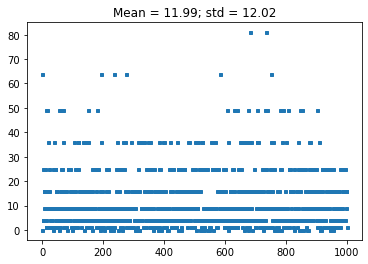

In [4]:
#Generate data
data = np.random.poisson(3, 1000) ** 2

mean = np.mean(data)
std = np.std(data, ddof = 1)

plt.plot(data,'s', markersize = 3)
plt.title(f'Mean = {np.round(mean, 2)}; std = {np.round(std, 2)}');

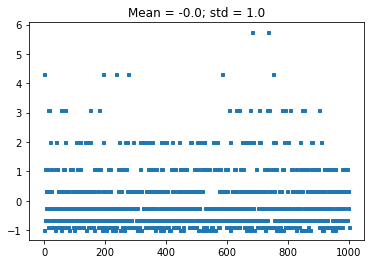

In [6]:
#Z-score
z = (data - mean) / std

#Or using built in function
z_function = stats.zscore(data, ddof = 1)

# compute the mean and std
z_mean = np.mean(z)
z_std = np.std(z, ddof = 1)

plt.plot(z, 's', markersize = 3)
plt.title(f'Mean = {np.round(z_mean, 2)}; std = {np.round(z_std, 2)}');

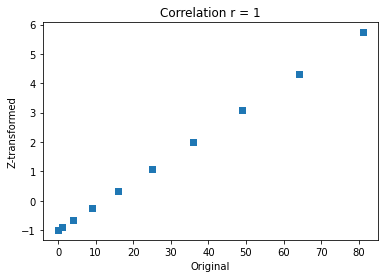

In [8]:
#Show data still distributed the same
plt.plot(data, z, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title('Correlation r = %g'%np.corrcoef(data, z)[0,0])

# Scaling

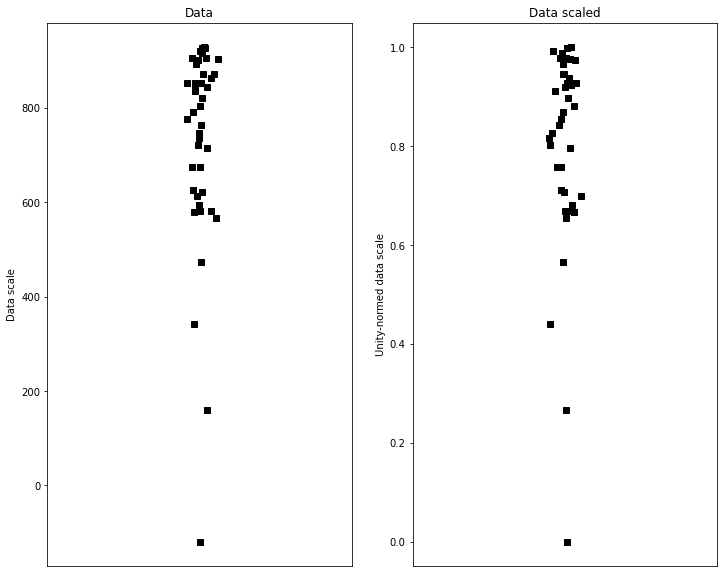

In [10]:
n = 42
data = np.log(np.random.rand(n)) * 234 + 934

min_point = min(data)
max_point = max(data)
scaled = (data - min_point) / (max_point - min_point)

fig,ax = plt.subplots(1, 2, figsize=(12,10))
ax[0].plot(1 + np.random.randn(n) / 20, data, 'ks')
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Data scale')
ax[0].set_title('Data')

ax[1].plot(1 + np.random.randn(n) / 20, scaled, 'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Data scaled');

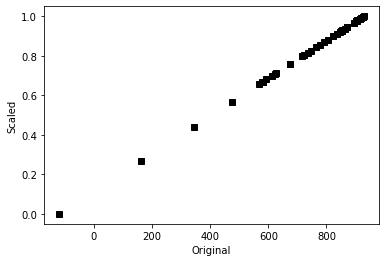

In [11]:
#See data distributed the same
plt.plot(data, scaled, 'ks')
plt.xlabel('Original')
plt.ylabel('Scaled')

In [15]:
#Can now make data have any arbitrary scale
min_new = 3
max_new = 12.87

super_scaled = scaled * (max_new - min_new) + min_new

# test it!
print([min(super_scaled), max(super_scaled)])

[3.0, 12.87]


# Z-Score Outlier Removal

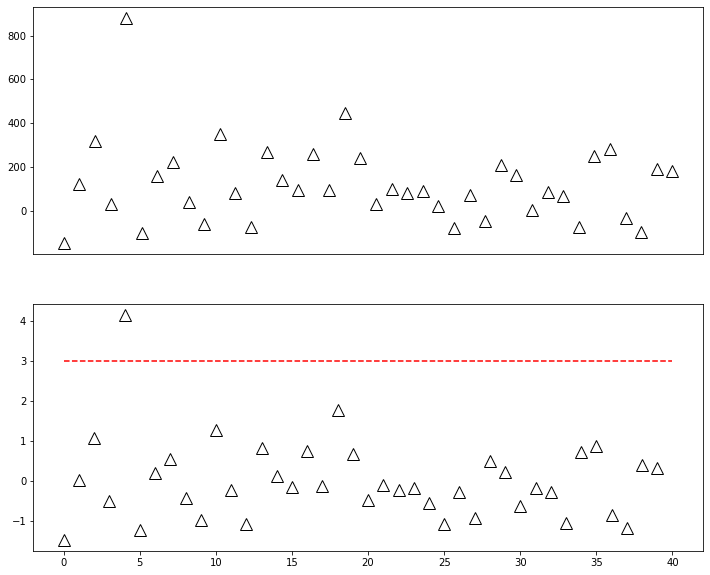

In [6]:
#Make data with outliers
n = 40
data = np.random.randn(n)
data[data < -1] = data[data < -1] + 2
data[data > 2] = data[data > 2] ** 2
data = data * 200 + 50

z_data = (data - np.mean(data)) / np.std(data)
z_threshold = 3

#Plot the data
fig,ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])

#Mark line for data points >3 stds away
ax[1].plot(z_data, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, n], [z_threshold, z_threshold], 'r--');

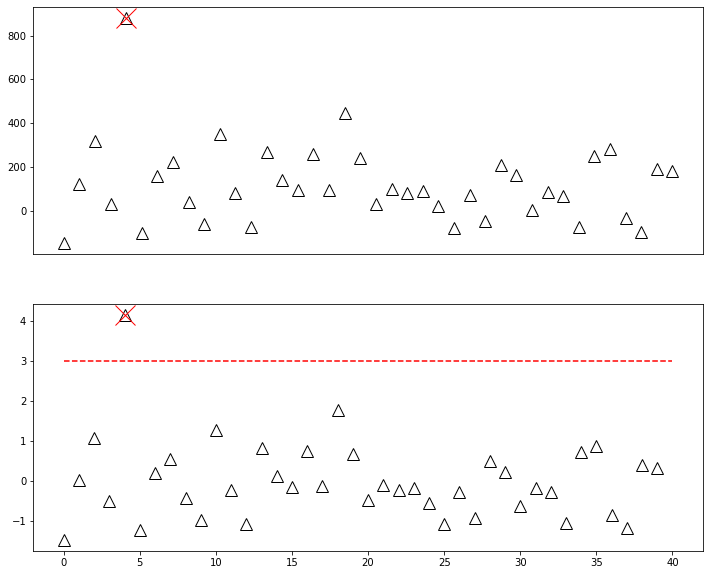

In [7]:
#Identify outliers
outliers = np.where(abs(z_data) > z_threshold)[0]

ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, z_data[outliers], 'x', color='r', markersize=20)

fig

Points to remove:
[ 4 10 18]


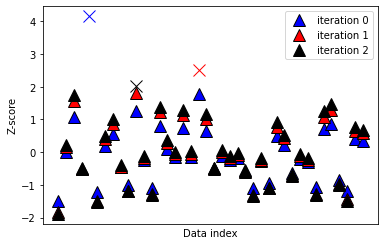

In [8]:
#Iterative way
new_thresh = 2
z_data = (data - np.mean(data)) / np.std(data)

z_color = 'brkm'
cycles = 0
while True:
    #Convert data to z scale
    mean = np.nanmean(z_data)
    std = np.nanstd(z_data)
    z_data = (z_data - mean) / std
    
    #Points to remove
    outliers = z_data > new_thresh
    
    if sum(outliers) == 0:
        break
    else:
        plt.plot(np.where(outliers)[0], z_data[outliers], '%sx'%z_color[cycles], markersize=12)
        z_data[outliers] = np.nan
    
    plt.plot(z_data, 'k^', markersize=12, markerfacecolor = z_color[cycles], label = 'iteration %g'%cycles)
    cycles = cycles + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()

remove = np.where(np.isnan(z_data))[0]
print("Points to remove:")
print(remove)

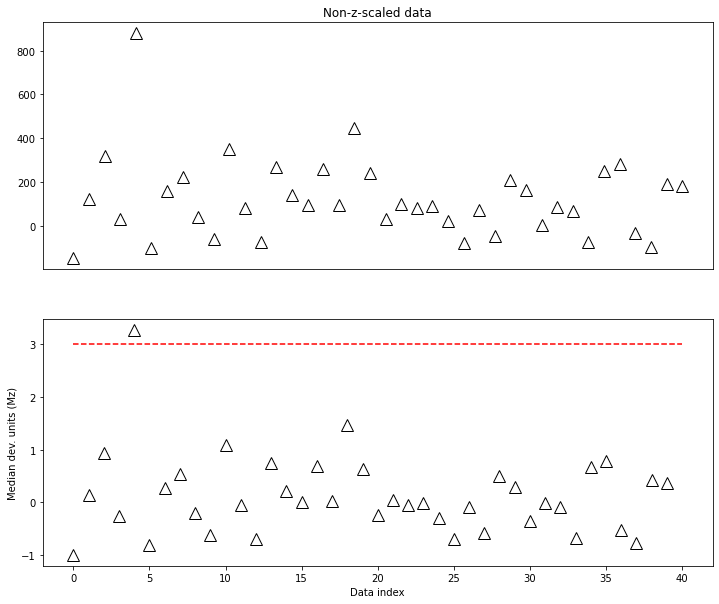

In [9]:
#Z for non-normal distributions
med = np.median(data)
mad = robust.mad(data)
mz_data = stats.norm.ppf(.75) * (data - med) / mad

fig,ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_title("Non-z-scaled data")

ax[1].plot(mz_data, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, n], [z_threshold, z_threshold], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)');

# Euclidean Distance Outlier Removal

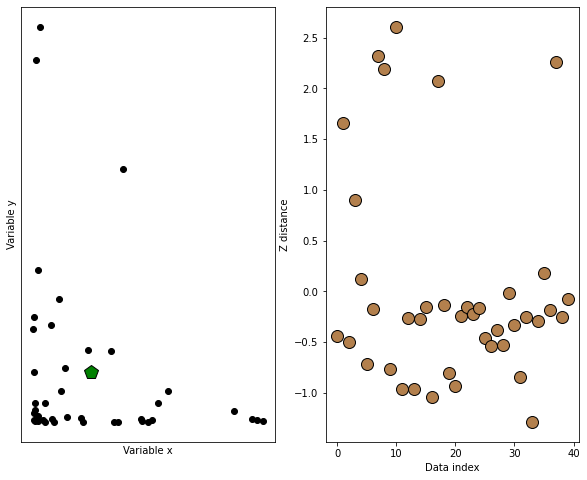

In [30]:
n = 40
d_1 = np.exp(-abs(np.random.randn(n) * 3))
d_2 = np.exp(-abs(np.random.randn(n) * 5))
mean = [np.mean(d_1), np.mean(d_2)]

ds = np.zeros(n)
for i in range(n):
    ds[i] = np.sqrt((d_1[i] - mean[0]) ** 2 + (d_2[i] - mean[1]) ** 2)
ds = (ds - np.mean(ds)) / np.std(ds)

fig,ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].plot(d_1, d_2, 'ko', markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

#Plot multivariate mean
ax[0].plot(mean[0], mean[1], 'kp', markerfacecolor='g', markersize=15)

#Plot distances
ax[1].plot(ds, 'ko', markerfacecolor=[.7, .5, .3], markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance');

[10]


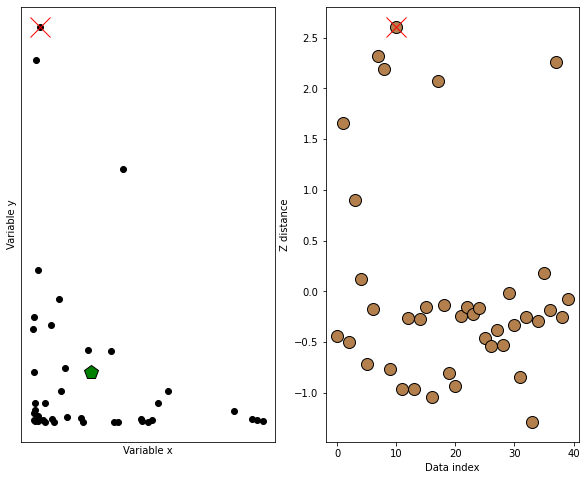

In [31]:
#Threshold removal
d_threshold = 2.5

out = np.where(ds > d_threshold)[0]
print(out)

ax[1].plot(out, ds[out], 'x', color='r', markersize=20)
ax[0].plot(d_1[out], d_2[out], 'x', color='r', markersize=20)

fig

# Outliers: Data Trimming

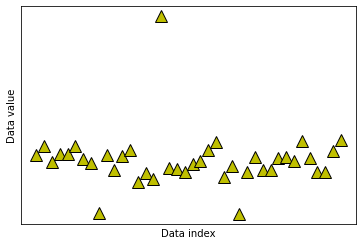

In [3]:
n = 40
data = np.random.randn(n)
data[data < -2] = -data[data < -2] ** 2
data[data > 2] = data[data > 2] ** 2
mean_data = data - np.mean(data)

fig,ax = plt.subplots(1, 1)
ax.plot(data, 'k^', markerfacecolor = 'y', markersize = 12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data index')
ax.set_ylabel('Data value');

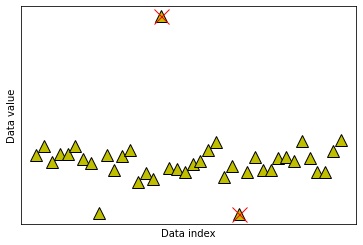

In [4]:
#One way: remove k% of the data

percent_trim = 5
cut_off = np.percentile(abs(mean_data), 100 - percent_trim)

to_cut = np.where(abs(mean_data) > cut_off)[0]
ax.plot(to_cut, data[to_cut], 'rx', markersize = 15)

fig

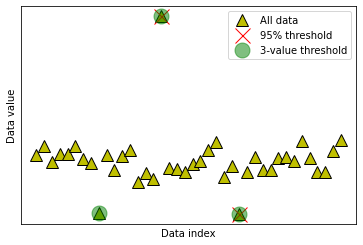

In [5]:
#Other: remove k most extreme values

k_remove = 3

data_sort = np.argsort(abs(mean_data), axis = 0)[::-1]
to_cut_extreme = np.squeeze(data_sort[:k_remove])

ax.plot(to_cut_extreme, data[to_cut_extreme], 'go', markersize = 15, alpha = .5)
ax.legend(('All data','%g%% threshold'%(100 - percent_trim),'%g-value threshold'%k_remove))
fig